<a href="https://colab.research.google.com/github/AlekseyCP/S1-Modelo_Predictivo/blob/main/S1_Modelo_Predictivo_N3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer
)
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.feature_selection import mutual_info_classif

In [3]:
#Se sube el dataset
uploaded = files.upload()
df_algebra = pd.read_excel("Dataset_Modelo_Predictivo.xlsx", sheet_name="Algebra")
df_aritmetica = pd.read_excel("Dataset_Modelo_Predictivo.xlsx", sheet_name="Aritmetica")
df_geometria = pd.read_excel("Dataset_Modelo_Predictivo.xlsx", sheet_name="Geometria")
df_rm = pd.read_excel("Dataset_Modelo_Predictivo.xlsx", sheet_name="RM")
df_fisica = pd.read_excel("Dataset_Modelo_Predictivo.xlsx", sheet_name="Fisica")
df_quimica = pd.read_excel("Dataset_Modelo_Predictivo.xlsx", sheet_name="Quimica")
#Se eliminan las columnas de grado, seccion y numero de orden
df_algebra = df_algebra.drop(['Grado', 'Sección', 'N° Orden'], axis=1)
df_aritmetica = df_aritmetica.drop(['Grado', 'Sección', 'N° Orden'], axis=1)
df_geometria = df_geometria.drop(['Grado', 'Sección', 'N° Orden'], axis=1)
df_rm = df_rm.drop(['Grado', 'Sección', 'N° Orden'], axis=1)
df_fisica = df_fisica.drop(['Grado', 'Sección', 'N° Orden'], axis=1)
df_quimica = df_quimica.drop(['Grado', 'Sección', 'N° Orden'], axis=1)
#Se eliminan los alumnos con los que no se cuente con las notas
df_algebra.dropna(subset=['Label'], inplace=True)
df_aritmetica.dropna(subset=['Label'], inplace=True)
df_geometria.dropna(subset=['Label'], inplace=True)
df_rm.dropna(subset=['Label'], inplace=True)
df_fisica.dropna(subset=['Label'], inplace=True)
df_quimica.dropna(subset=['Label'], inplace=True)


# Muestra de los datasets

In [5]:
#Dataset Algebra
df_algebra.head()

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,TieneAmbosPadres
0,B,Hombre,Estudios de posgrado,Estudios de posgrado,Si,Si,Entre 1 y 2 horas,Dos comidas al día,"Si, tengo internet estable todo el tiempo",Trabajo ocasionalmente (fines de semana o vaca...,No tengo responsabilidades domésticas signific...,1
1,A,Hombre,Estudios de posgrado,Superior Universitario,No,Si,Menos de 1 hora,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,Ayudo en casa pero no interfiere con mis estudios,1
2,A,Mujer,Superior Universitario,Superior técnico,Si,Si,Entre 1 y 2 horas,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,No tengo responsabilidades domésticas signific...,1
3,A,Mujer,Estudios de posgrado,Estudios de posgrado,Si,No,Entre 1 y 2 horas,Tres comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1
4,A,Mujer,Superior técnico,Superior técnico,No,Si,Más de 3 horas,Dos comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1


In [6]:
#Dataset Aritmetica
df_aritmetica.head()

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,TieneAmbosPadres
0,B,Hombre,Estudios de posgrado,Estudios de posgrado,Si,Si,Entre 1 y 2 horas,Dos comidas al día,"Si, tengo internet estable todo el tiempo",Trabajo ocasionalmente (fines de semana o vaca...,No tengo responsabilidades domésticas signific...,1
1,A,Hombre,Estudios de posgrado,Superior Universitario,No,Si,Menos de 1 hora,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,Ayudo en casa pero no interfiere con mis estudios,1
2,A,Mujer,Superior Universitario,Superior técnico,Si,Si,Entre 1 y 2 horas,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,No tengo responsabilidades domésticas signific...,1
3,A,Mujer,Estudios de posgrado,Estudios de posgrado,Si,No,Entre 1 y 2 horas,Tres comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1
4,A,Mujer,Superior técnico,Superior técnico,No,Si,Más de 3 horas,Dos comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1


In [7]:
#Dataset Geometria
df_geometria.head()

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,TieneAmbosPadres
0,B,Hombre,Estudios de posgrado,Estudios de posgrado,Si,Si,Entre 1 y 2 horas,Dos comidas al día,"Si, tengo internet estable todo el tiempo",Trabajo ocasionalmente (fines de semana o vaca...,No tengo responsabilidades domésticas signific...,1
1,A,Hombre,Estudios de posgrado,Superior Universitario,No,Si,Menos de 1 hora,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,Ayudo en casa pero no interfiere con mis estudios,1
2,A,Mujer,Superior Universitario,Superior técnico,Si,Si,Entre 1 y 2 horas,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,No tengo responsabilidades domésticas signific...,1
3,A,Mujer,Estudios de posgrado,Estudios de posgrado,Si,No,Entre 1 y 2 horas,Tres comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1
4,A,Mujer,Superior técnico,Superior técnico,No,Si,Más de 3 horas,Dos comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1


In [8]:
#Dataset RM
df_rm.head()

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,TieneAmbosPadres
0,B,Hombre,Estudios de posgrado,Estudios de posgrado,Si,Si,Entre 1 y 2 horas,Dos comidas al día,"Si, tengo internet estable todo el tiempo",Trabajo ocasionalmente (fines de semana o vaca...,No tengo responsabilidades domésticas signific...,1
1,AD,Hombre,Estudios de posgrado,Superior Universitario,No,Si,Menos de 1 hora,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,Ayudo en casa pero no interfiere con mis estudios,1
2,A,Mujer,Superior Universitario,Superior técnico,Si,Si,Entre 1 y 2 horas,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,No tengo responsabilidades domésticas signific...,1
3,A,Mujer,Estudios de posgrado,Estudios de posgrado,Si,No,Entre 1 y 2 horas,Tres comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1
4,A,Mujer,Superior técnico,Superior técnico,No,Si,Más de 3 horas,Dos comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1


In [9]:
#Dataset Fisica
df_fisica.head()

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,TieneAmbosPadres
0,B,Hombre,Estudios de posgrado,Estudios de posgrado,Si,Si,Entre 1 y 2 horas,Dos comidas al día,"Si, tengo internet estable todo el tiempo",Trabajo ocasionalmente (fines de semana o vaca...,No tengo responsabilidades domésticas signific...,1
1,A,Hombre,Estudios de posgrado,Superior Universitario,No,Si,Menos de 1 hora,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,Ayudo en casa pero no interfiere con mis estudios,1
2,A,Mujer,Superior Universitario,Superior técnico,Si,Si,Entre 1 y 2 horas,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,No tengo responsabilidades domésticas signific...,1
3,A,Mujer,Estudios de posgrado,Estudios de posgrado,Si,No,Entre 1 y 2 horas,Tres comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1
4,A,Mujer,Superior técnico,Superior técnico,No,Si,Más de 3 horas,Dos comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1


In [10]:
#Dataset Quimica
df_quimica.head()

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,TieneAmbosPadres
0,A,Hombre,Estudios de posgrado,Estudios de posgrado,Si,Si,Entre 1 y 2 horas,Dos comidas al día,"Si, tengo internet estable todo el tiempo",Trabajo ocasionalmente (fines de semana o vaca...,No tengo responsabilidades domésticas signific...,1
1,A,Hombre,Estudios de posgrado,Superior Universitario,No,Si,Menos de 1 hora,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,Ayudo en casa pero no interfiere con mis estudios,1
2,A,Mujer,Superior Universitario,Superior técnico,Si,Si,Entre 1 y 2 horas,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,No tengo responsabilidades domésticas signific...,1
3,A,Mujer,Estudios de posgrado,Estudios de posgrado,Si,No,Entre 1 y 2 horas,Tres comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1
4,AD,Mujer,Superior técnico,Superior técnico,No,Si,Más de 3 horas,Dos comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1


# Información de cada dataset

In [17]:
print(df_algebra.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             218 non-null    object
 1   P1                218 non-null    object
 2   P2                218 non-null    object
 3   P3                218 non-null    object
 4   P4                218 non-null    object
 5   P5                218 non-null    object
 6   P6                218 non-null    object
 7   P7                217 non-null    object
 8   P8                218 non-null    object
 9   P9                218 non-null    object
 10  P10               218 non-null    object
 11  TieneAmbosPadres  218 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 20.6+ KB
None


In [18]:
print(df_aritmetica.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             218 non-null    object
 1   P1                218 non-null    object
 2   P2                218 non-null    object
 3   P3                218 non-null    object
 4   P4                218 non-null    object
 5   P5                218 non-null    object
 6   P6                218 non-null    object
 7   P7                217 non-null    object
 8   P8                218 non-null    object
 9   P9                218 non-null    object
 10  P10               218 non-null    object
 11  TieneAmbosPadres  218 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 20.6+ KB
None


In [19]:
print(df_rm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             218 non-null    object
 1   P1                218 non-null    object
 2   P2                218 non-null    object
 3   P3                218 non-null    object
 4   P4                218 non-null    object
 5   P5                218 non-null    object
 6   P6                218 non-null    object
 7   P7                217 non-null    object
 8   P8                218 non-null    object
 9   P9                218 non-null    object
 10  P10               218 non-null    object
 11  TieneAmbosPadres  218 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 20.6+ KB
None


In [20]:
print(df_geometria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             218 non-null    object
 1   P1                218 non-null    object
 2   P2                218 non-null    object
 3   P3                218 non-null    object
 4   P4                218 non-null    object
 5   P5                218 non-null    object
 6   P6                218 non-null    object
 7   P7                217 non-null    object
 8   P8                218 non-null    object
 9   P9                218 non-null    object
 10  P10               218 non-null    object
 11  TieneAmbosPadres  218 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 20.6+ KB
None


In [21]:
print(df_fisica.info())

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 0 to 217
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             215 non-null    object
 1   P1                215 non-null    object
 2   P2                215 non-null    object
 3   P3                215 non-null    object
 4   P4                215 non-null    object
 5   P5                215 non-null    object
 6   P6                215 non-null    object
 7   P7                214 non-null    object
 8   P8                215 non-null    object
 9   P9                215 non-null    object
 10  P10               215 non-null    object
 11  TieneAmbosPadres  215 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 21.8+ KB
None


In [22]:
print(df_quimica.info())

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 217
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             217 non-null    object
 1   P1                217 non-null    object
 2   P2                217 non-null    object
 3   P3                217 non-null    object
 4   P4                217 non-null    object
 5   P5                217 non-null    object
 6   P6                217 non-null    object
 7   P7                216 non-null    object
 8   P8                217 non-null    object
 9   P9                217 non-null    object
 10  P10               217 non-null    object
 11  TieneAmbosPadres  217 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 22.0+ KB
None


# Transformar las variables del dataset

In [23]:
#Función para pasar las notas a booleano
def transformar_notas(df):
    mapa = {
        'A': True,
        'AD': True,
        'B': True,
        'C': False
    }
    df['Label'] = df['Label'].map(mapa)
    return df


In [24]:
#Se transforman las notas de todos los cursos
df_algebra = transformar_notas(df_algebra)
df_aritmetica = transformar_notas(df_aritmetica)
df_geometria = transformar_notas(df_geometria)
df_rm = transformar_notas(df_rm)
df_fisica = transformar_notas(df_fisica)
df_quimica = transformar_notas(df_quimica)
#Muestra
df_algebra.head()

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,TieneAmbosPadres
0,True,Hombre,Estudios de posgrado,Estudios de posgrado,Si,Si,Entre 1 y 2 horas,Dos comidas al día,"Si, tengo internet estable todo el tiempo",Trabajo ocasionalmente (fines de semana o vaca...,No tengo responsabilidades domésticas signific...,1
1,True,Hombre,Estudios de posgrado,Superior Universitario,No,Si,Menos de 1 hora,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,Ayudo en casa pero no interfiere con mis estudios,1
2,True,Mujer,Superior Universitario,Superior técnico,Si,Si,Entre 1 y 2 horas,Tres comidas al día,"Si, tengo internet estable todo el tiempo",No trabajo,No tengo responsabilidades domésticas signific...,1
3,True,Mujer,Estudios de posgrado,Estudios de posgrado,Si,No,Entre 1 y 2 horas,Tres comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1
4,True,Mujer,Superior técnico,Superior técnico,No,Si,Más de 3 horas,Dos comidas al día,"Si, pero a veces se corta o es lento",No trabajo,Tengo bastantes responsabilidades que a veces ...,1


In [26]:
#Pasamos las respuestas a one hot encoding
df_algebra=pd.get_dummies(df_algebra)
df_aritmetica=pd.get_dummies(df_aritmetica)
df_geometria=pd.get_dummies(df_geometria)
df_rm=pd.get_dummies(df_rm)
df_fisica=pd.get_dummies(df_fisica)
df_quimica=pd.get_dummies(df_quimica)

#Pasarlos otros datos a entero excepto el Label
df_algebra=df_algebra.astype(int)
df_algebra['Label']=df_algebra['Label'].astype(bool)
df_aritmetica=df_aritmetica.astype(int)
df_aritmetica['Label']=df_aritmetica['Label'].astype(bool)
df_rm=df_rm.astype(int)
df_rm['Label']=df_rm['Label'].astype(bool)
df_geometria=df_geometria.astype(int)
df_geometria['Label']=df_geometria['Label'].astype(bool)
df_fisica=df_fisica.astype(int)
df_fisica['Label']=df_fisica['Label'].astype(bool)
df_quimica=df_quimica.astype(int)
df_quimica['Label']=df_quimica['Label'].astype(bool)
#Muestra
df_algebra.head()

,Label,TieneAmbosPadres,P1_Hombre,P1_Mujer,P2_Estudios de posgrado,P2_No tiene,P2_Primaria,P2_Secundaria,P2_Superior Universitario,P2_Superior técnico,...,"P8_Si, tengo internet estable todo el tiempo",P8_Solo a veces (internet limitado),P9_No trabajo,P9_Trabajo algunas horas entre semana,P9_Trabajo ocasionalmente (fines de semana o vacaciones),P9_Trabajo todos los días después del colegio,P10_Ayudo en casa pero no interfiere con mis estudios,P10_No tengo responsabilidades domésticas significativas,P10_Tengo bastantes responsabilidades que a veces interfieren,P10_Tengo muchas responsabilidades que frecuentemente interfieren con mis estudios
0,True,1,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,True,1,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,True,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
3,True,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,True,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [27]:
def eliminarColumnasRedundantes(df):
  df = df.drop(['P1_Mujer','P2_No tiene','P3_No tiene', 'P4_No', 'P5_No','P6_Menos de 1 hora','P7_Una comida al día','P8_Solo a veces (internet limitado)','P9_No trabajo','P10_No tengo responsabilidades domésticas significativas'], axis=1)
  Renombrar_P4 = {'P4_Si': 'P4'}
  Renombrar_P5 = {'P5_Si': 'P5'}
  # Usamos .rename() y aplicamos los cambios directamente con inplace=True
  df.rename(columns=Renombrar_P4, inplace=True)
  df.rename(columns=Renombrar_P5, inplace=True)
  return df

In [28]:
df_algebra = eliminarColumnasRedundantes(df_algebra)
df_aritmetica = eliminarColumnasRedundantes(df_aritmetica)
df_geometria = eliminarColumnasRedundantes(df_geometria)
df_rm = eliminarColumnasRedundantes(df_rm)
df_fisica = eliminarColumnasRedundantes(df_fisica)
df_quimica = eliminarColumnasRedundantes(df_quimica)

# Relación de los features

In [29]:
def mutualInfo(df):
    X = df.drop("Label", axis=1)
    y = df["Label"]

    mi = mutual_info_classif(X, y, discrete_features='auto')

    mi_df = pd.DataFrame({
        "feature": X.columns,
        "mutual_info": mi
    })

    mi_df_sorted = mi_df.sort_values(by="mutual_info", ascending=False)
    print(mi_df_sorted)
    print(mi_df_sorted.count())

In [30]:
mutualInfo(df_algebra)

                                              feature  mutual_info
15                               P6_Entre 2 y 3 horas     0.053789
5                           P2_Superior Universitario     0.035830
12                                                 P4     0.034710
16                                  P6_Más de 3 horas     0.025405
23  P9_Trabajo ocasionalmente (fines de semana o v...     0.022880
26  P10_Tengo bastantes responsabilidades que a ve...     0.021359
27  P10_Tengo muchas responsabilidades que frecuen...     0.019711
6                                 P2_Superior técnico     0.017830
18                              P7_Dos comidas al día     0.016432
8                                        P3_Primaria      0.010431
14                               P6_Entre 1 y 2 horas     0.010098
20            P8_Si, pero a veces se corta o es lento     0.006410
4                                       P2_Secundaria     0.005623
9                                       P3_Secundaria     0.00

In [31]:
mutualInfo(df_aritmetica)

                                              feature  mutual_info
13                                                 P5     0.076595
0                                    TieneAmbosPadres     0.021922
10                          P3_Superior Universitario     0.010025
5                           P2_Superior Universitario     0.009180
15                               P6_Entre 2 y 3 horas     0.008965
19                             P7_Tres comidas al día     0.007988
2                             P2_Estudios de posgrado     0.006889
7                             P3_Estudios de posgrado     0.003486
1                                           P1_Hombre     0.000007
6                                 P2_Superior técnico     0.000000
3                                        P2_Primaria      0.000000
4                                       P2_Secundaria     0.000000
11                                P3_Superior técnico     0.000000
9                                       P3_Secundaria     0.00

# Random Forest

In [32]:
def RandomForest(df, curso):
    # X = todas las columnas excepto Label
    X = df.drop("Label", axis=1)
    y = df["Label"]

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Entrenar Random Forest
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # MATRIZ DE CONFUSIÓN
    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))

    plt.figure(figsize=(5,4))
    disp.plot(cmap='Blues', colorbar=False)
    plt.title(f"Matriz de Confusión - {curso}")
    plt.show()

    # Métricas
    resultados = {
        "Curso": curso,
        'Accuracy': round(accuracy_score(y_test, y_pred), 3),
        'Precision': round(precision_score(y_test, y_pred, average='macro', zero_division=0), 3),
        'F1-Score': round(f1_score(y_test, y_pred, average='macro', zero_division=0), 3)
    }

    return model, resultados


<Figure size 500x400 with 0 Axes>

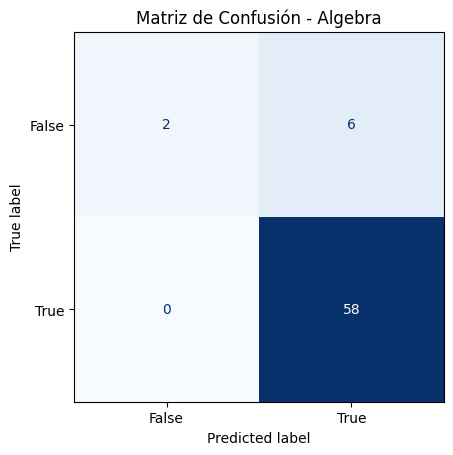


{'Curso': 'Algebra', 'Accuracy': 0.909, 'Precision': 0.953, 'F1-Score': 0.675}


In [33]:
#Curso de Algebra
model_algebra, resultados_algebra = RandomForest(df_algebra, "Algebra")
print("")
print(resultados_algebra)

<Figure size 500x400 with 0 Axes>

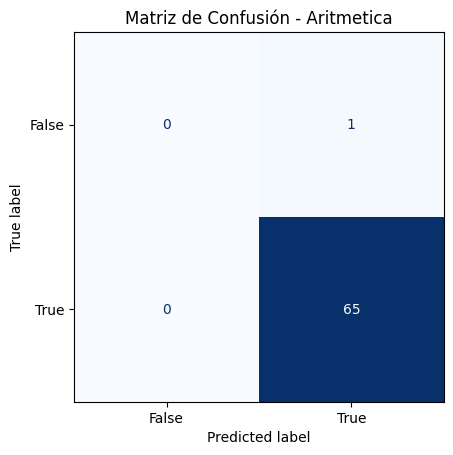


{'Curso': 'Aritmetica', 'Accuracy': 0.985, 'Precision': 0.492, 'F1-Score': 0.496}


In [34]:
#Curso de Aritmetica
model_aritmetica, resultados_aritmetica = RandomForest(df_aritmetica, "Aritmetica")
print("")
print(resultados_aritmetica)

<Figure size 500x400 with 0 Axes>

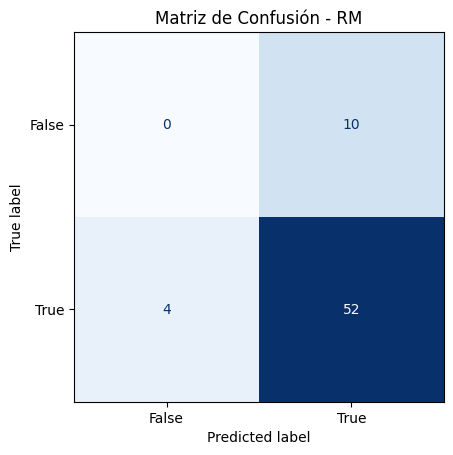


{'Curso': 'RM', 'Accuracy': 0.788, 'Precision': 0.419, 'F1-Score': 0.441}


In [35]:
#curso de RM
model_rm, resultados_rm = RandomForest(df_rm, "RM")
print("")
print(resultados_rm)

<Figure size 500x400 with 0 Axes>

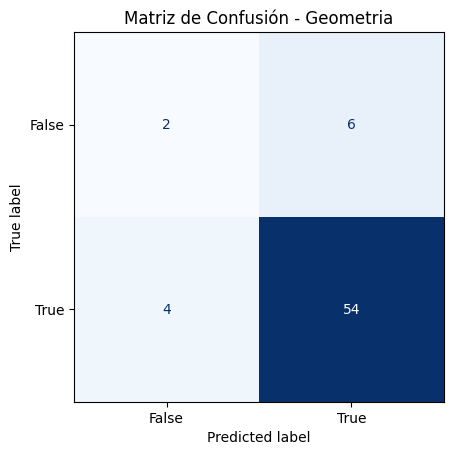


{'Curso': 'Geometria', 'Accuracy': 0.848, 'Precision': 0.617, 'F1-Score': 0.6}


In [36]:
model_geometria, resultados_geometria = RandomForest(df_geometria, "Geometria")
print("")
print(resultados_geometria)

<Figure size 500x400 with 0 Axes>

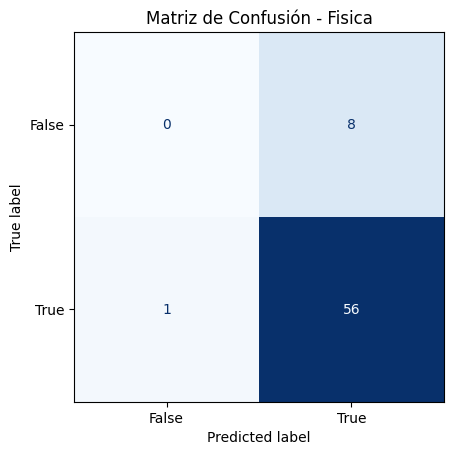


{'Curso': 'Fisica', 'Accuracy': 0.862, 'Precision': 0.438, 'F1-Score': 0.463}


In [37]:
model_fisica, resultados_fisica = RandomForest(df_fisica, "Fisica")
print("")
print(resultados_fisica)

<Figure size 500x400 with 0 Axes>

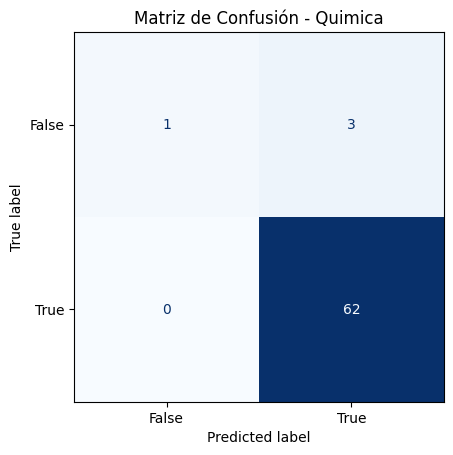


{'Curso': 'Quimica', 'Accuracy': 0.955, 'Precision': 0.977, 'F1-Score': 0.688}


In [38]:
model_quimica, resultados_quimica = RandomForest(df_quimica, "Quimica")
print("")
print(resultados_quimica)

# Regresión Logistica

In [39]:
def RegresionLogistica(df, curso):
    # X = todas las columnas excepto Label
    X = df.drop("Label", axis=1)
    y = df["Label"]
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    # Modelo de Regresión Logística
    model = LogisticRegression(
            random_state=42,
            class_weight='balanced',
            max_iter=1000,        # asegura convergencia
            solver='lbfgs',       # compatible con multiclase
            multi_class='auto'    # detección automática
        )
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # MATRIZ DE CONFUSIÓN
    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))

    plt.figure(figsize=(5,4))
    disp.plot(cmap='Blues', colorbar=False)
    plt.title(f"Matriz de Confusión - {curso}")
    plt.show()

    # Métricas
    resultados = {
        "Curso": curso,
        'Accuracy': round(accuracy_score(y_test, y_pred), 3),
        'Precision': round(precision_score(y_test, y_pred, average='macro', zero_division=0), 3),
        'F1-Score': round(f1_score(y_test, y_pred, average='macro', zero_division=0), 3)
    }

    return model, resultados

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

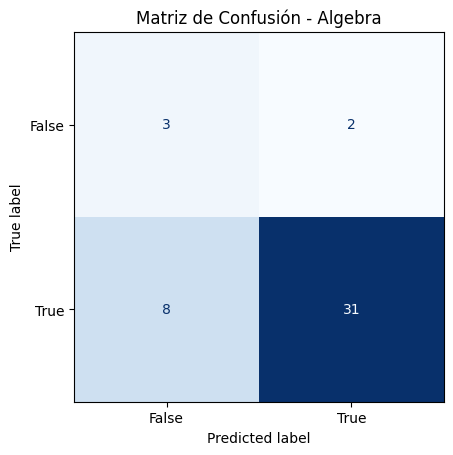


{'Curso': 'Algebra', 'Accuracy': 0.773, 'Precision': 0.606, 'F1-Score': 0.618}


In [40]:
model_algebra_lr, resultados_algebra_lr = RegresionLogistica(df_algebra, "Algebra")
print("")
print(resultados_algebra_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

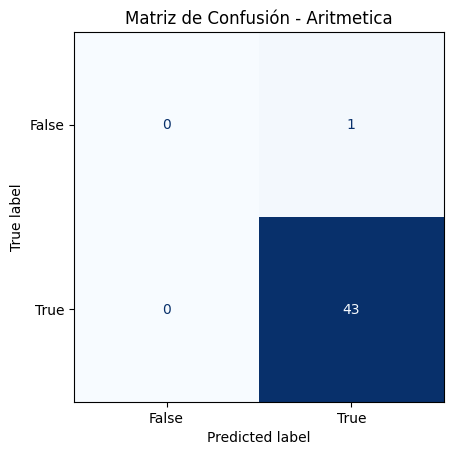


{'Curso': 'Aritmetica', 'Accuracy': 0.977, 'Precision': 0.489, 'F1-Score': 0.494}


In [41]:
model_aritmetica_lr, resultados_aritmetica_lr = RegresionLogistica(df_aritmetica, "Aritmetica")
print("")
print(resultados_aritmetica_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

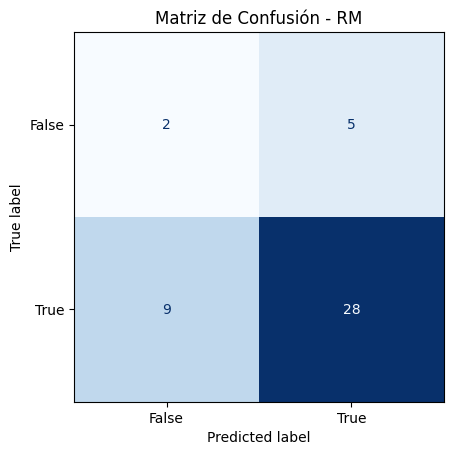


{'Curso': 'RM', 'Accuracy': 0.682, 'Precision': 0.515, 'F1-Score': 0.511}


In [42]:
model_rm_lr, resultados_rm_lr = RegresionLogistica(df_rm, "RM")
print("")
print(resultados_rm_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

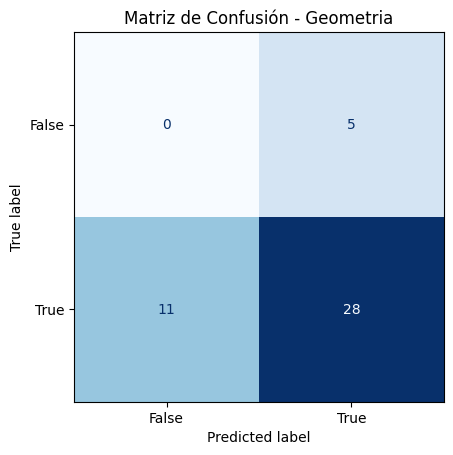


{'Curso': 'Geometria', 'Accuracy': 0.636, 'Precision': 0.424, 'F1-Score': 0.389}


In [43]:
model_geometria_lr, resultados_geometria_lr = RegresionLogistica(df_geometria, "Geometria")
print("")
print(resultados_geometria_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

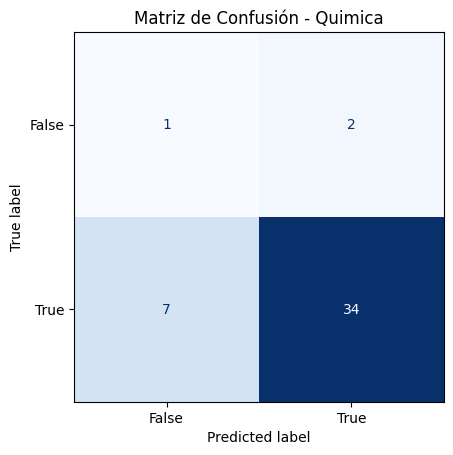


{'Curso': 'Quimica', 'Accuracy': 0.795, 'Precision': 0.535, 'F1-Score': 0.532}


In [44]:
model_quimica_lr, resultados_quimica_lr = RegresionLogistica(df_quimica, "Quimica")
print("")
print(resultados_quimica_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 500x400 with 0 Axes>

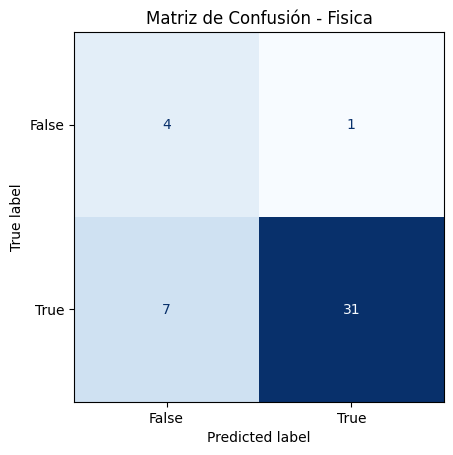


{'Curso': 'Fisica', 'Accuracy': 0.814, 'Precision': 0.666, 'F1-Score': 0.693}


In [45]:
model_fisica_lr, resultados_fisica_lr = RegresionLogistica(df_fisica, "Fisica")
print("")
print(resultados_fisica_lr)

# Cross Validation

## Regresión Logistica

In [61]:
def RegresionLogisticaCross(df, curso):

    X = df.drop('Label', axis=1)
    y = df['Label']

    # 2. Train-test split (30% para testeo)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )


    print("## Evaluación Inicial con Cross-Validation (k=5)")
    base_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

    # Aplica K-Fold Cross-Validation con 5 pliegues
    cv_scores = cross_val_score(base_model, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-Val Accuracy Scores:", cv_scores)
    print(f"Mean CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

    # 4. Optimización de Hiperparámetros con Grid Search (CV=5)
    print("\n## ⚙️ Optimización de Hiperparámetros con Grid Search")
    param_grid = {'C': np.logspace(-4, 4, 30)} # Rango amplio para el parámetro de regularización C

    # Configuración de GridSearchCV con CV=5
    grid = GridSearchCV(
        estimator=LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
        param_grid=param_grid,
        scoring='precision_macro', # Métrica a optimizar
        cv=5
    )

    # Entrenar Grid Search
    grid.fit(X_train, y_train)

    best_C = grid.best_params_['C']
    print(f"Mejor valor de C (GridSearch): {best_C}")
    print(f"Mejor precision promedio (CV): {grid.best_score_:.3f}")

    # 5. Entrenar el Modelo Final con el mejor parámetro C
    model = LogisticRegression(C=best_C, max_iter=1000, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)

    # 6. Predicción y Evaluación en el conjunto de TEST
    y_test_pred = model.predict(X_test)

    # Matriz de Confusión
    labels_sorted = sorted(y.unique())
    cm = confusion_matrix(y_test, y_test_pred, labels=labels_sorted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_sorted)

    plt.figure(figsize=(6,5))
    disp.plot(cmap='Blues', colorbar=False)
    plt.title(f"Matriz de Confusión - {curso}")
    plt.show()

    # Métricas de Rendimiento
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

    print("\n## Resultados Finales en el conjunto de TEST:")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"F1-Score:  {f1:.3f}")

    # Diccionario final para exportar / guardar
    resultados = {
        "Curso": curso,
        "C_optimo": best_C,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "F1-Score": round(f1, 3)
    }

    return model, resultados

In [58]:
def RegresionLogisticaCross(df, curso):
    # Separar X e y
    X = df.drop('Label', axis=1)
    y = df['Label']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    base_model = LogisticRegression(max_iter=1000, solver='liblinear')

    cv_scores = cross_val_score(base_model, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-Val Accuracy Scores:", cv_scores)
    print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std()))

    param_grid = {'C': np.logspace(-4, 4, 30)}

    grid = GridSearchCV(
        estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
        param_grid=param_grid,
        scoring='precision_macro',
        cv=5
    )

    grid.fit(X_train, y_train)

    best_C = grid.best_params_['C']
    print("Mejor valor de C (GridSearch):", best_C)
    print("Mejor precision promedio (CV):", grid.best_score_)

    model = LogisticRegression(C=best_C, max_iter=1000, solver='liblinear')
    model.fit(X_train, y_train)

    # Predicción final
    y_test_pred = model.predict(X_test)

    labels_sorted = sorted(y.unique())
    cm = confusion_matrix(y_test, y_test_pred, labels=labels_sorted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_sorted)

    plt.figure(figsize=(5,4))
    disp.plot(cmap='Blues', colorbar=False)
    plt.title(f"Matriz de Confusión - {curso}")
    plt.show()

    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

    print("\nResultados en TEST:")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"F1-Score:  {f1:.3f}")

    # Diccionario final para exportar / guardar
    resultados = {
        "Curso": curso,
        "C_optimo": best_C,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "F1-Score": round(f1, 3)
    }

    return model, resultados


Cross-Val Accuracy Scores: [0.83870968 0.83870968 0.86666667 0.86666667 0.83333333]
Mean CV Accuracy: 0.849 (+/- 0.015)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Mejor valor de C (GridSearch): 2.592943797404667
Mejor precision promedio (CV): 0.5816995073891625


<Figure size 500x400 with 0 Axes>

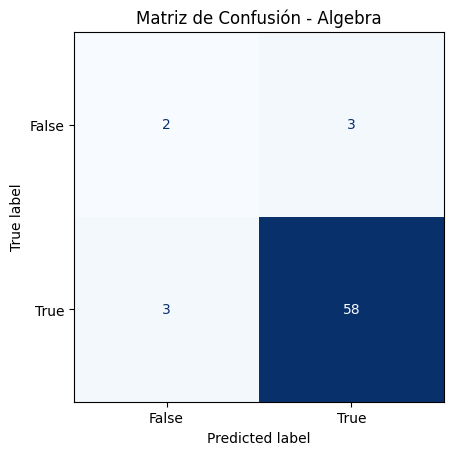


Resultados en TEST:
Accuracy:  0.909
Precision: 0.675
F1-Score:  0.675

{'Curso': 'Algebra', 'C_optimo': np.float64(2.592943797404667), 'Accuracy': 0.909, 'Precision': 0.675, 'F1-Score': 0.675}


In [59]:
model_algebra_lrcv, resultados_algebra_lrcv = RegresionLogisticaCross(df_algebra, "Algebra")
print("")
print(resultados_algebra_lrcv)

## Evaluación Inicial con Cross-Validation (k=5)
Cross-Val Accuracy Scores: [0.96774194 0.96774194 1.         1.         0.96666667]
Mean CV Accuracy: 0.980 (+/- 0.016)

## ⚙️ Optimización de Hiperparámetros con Grid Search


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

Mejor valor de C (GridSearch): 0.0001
Mejor precision promedio (CV): 0.690


<Figure size 600x500 with 0 Axes>

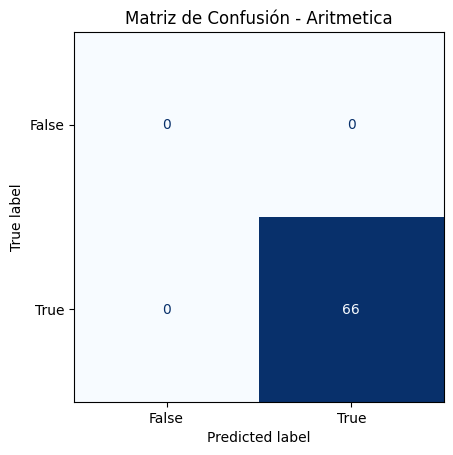


## Resultados Finales en el conjunto de TEST:
Accuracy:  1.000
Precision: 1.000
F1-Score:  1.000

{'Curso': 'Aritmetica', 'C_optimo': np.float64(0.0001), 'Accuracy': 1.0, 'Precision': 1.0, 'F1-Score': 1.0}


In [62]:
model_aritmetica_lrcv, resultados_aritmetica_lrcv = RegresionLogisticaCross(df_aritmetica, "Aritmetica")
print("")
print(resultados_aritmetica_lrcv)

## Random Forest

In [63]:
def RandomForestCross(df, curso):
    X = df.drop('Label', axis=1)
    y = df['Label']

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(random_state=42))
    ])

    param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=cv,
        n_jobs=-1
    )

    grid.fit(X, y)

    print("\n------------------------------------------------------")
    print("Mejores hiperparámetros encontrados:")
    print(grid.best_params_)
    print("Mejor accuracy (CV):", round(grid.best_score_, 3))
    print("------------------------------------------------------")

    best_model = grid.best_estimator_

    acc_scores = []
    prec_scores = []
    f1_scores = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_model.fit(X_train, y_train)
        pred = best_model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, pred))
        prec_scores.append(precision_score(y_test, pred, average='macro', zero_division=0))
        f1_scores.append(f1_score(y_test, pred, average='macro', zero_division=0))

    print("\nRESULTADOS DEL MODELO FINAL (PROMEDIO CV 5-FOLDS)")
    print("------------------------------------------------------")
    print("Accuracy :", round(np.mean(acc_scores), 3))
    print("Precision:", round(np.mean(prec_scores), 3))
    print("F1-Score :", round(np.mean(f1_scores), 3))
    print("------------------------------------------------------")

    resultados = {
        "Curso": curso,
        "Mejores_Hiperparametros": grid.best_params_,
        "Accuracy": round(np.mean(acc_scores), 3),
        "Precision": round(np.mean(prec_scores), 3),
        "F1-Score": round(np.mean(f1_scores), 3)
    }

    return best_model, resultados

In [64]:
model_algebra_cv, resultados_algebra_cv = RandomForestCross(df_algebra, "Algebra")
print("")
print(resultados_algebra_cv)


------------------------------------------------------
Mejores hiperparámetros encontrados:
{'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Mejor accuracy (CV): 0.885
------------------------------------------------------

RESULTADOS DEL MODELO FINAL (PROMEDIO CV 5-FOLDS)
------------------------------------------------------
Accuracy : 0.885
Precision: 0.646
F1-Score : 0.577
------------------------------------------------------

{'Curso': 'Algebra', 'Mejores_Hiperparametros': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}, 'Accuracy': np.float64(0.885), 'Precision': np.float64(0.646), 'F1-Score': np.float64(0.577)}


In [57]:
model_aritmetica_cv, resultados_aritmetica_cv = RandomForestCross(df_aritmetica, "Aritmetica")
print("")
print(resultados_aritmetica_cv)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



------------------------------------------------------
Mejores hiperparámetros encontrados:
{'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Mejor accuracy (CV): 0.986
------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



RESULTADOS DEL MODELO FINAL (PROMEDIO CV 5-FOLDS)
------------------------------------------------------
Accuracy : 0.986
Precision: 0.693
F1-Score : 0.697
------------------------------------------------------

{'Curso': 'Aritmetica', 'Mejores_Hiperparametros': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}, 'Accuracy': np.float64(0.986), 'Precision': np.float64(0.693), 'F1-Score': np.float64(0.697)}


In [51]:
model_rm_cv, resultados_rm_cv = RandomForestCross(df_rm, "RM")
print("")
print(resultados_rm_cv)


------------------------------------------------------
Mejores hiperparámetros encontrados:
{'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Mejor accuracy (CV): 0.858
------------------------------------------------------

RESULTADOS DEL MODELO FINAL (PROMEDIO CV 5-FOLDS)
------------------------------------------------------
Accuracy : 0.858
Precision: 0.528
F1-Score : 0.506
------------------------------------------------------

{'Curso': 'RM', 'Mejores_Hiperparametros': {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}, 'Accuracy': np.float64(0.858), 'Precision': np.float64(0.528), 'F1-Score': np.float64(0.506)}
